In [79]:
import numpy as np
import pandas as pd
import seaborn as sns

In [80]:
N = 50
df = pd.DataFrame({'x':range(N)})
pendiente = 3
ruido = 20
ordenada = 30

In [81]:
df['y'] = df['x'].apply(lambda x: pendiente*x + ruido*(np.random.random() - 1/2) + ordenada)
df['ruido1'] = pd.Series(ruido * np.random.rand(N))

agregar = True
m = 50
if agregar:
    df_ruidoso = df.copy()
    for i in range(m):
        df_ruidoso['ruido'+ str(i)] = pd.Series(ruido * np.random.rand(N))


In [82]:
df.head()

,x,y,ruido1
0,0,28.899068,17.700528
1,1,40.102537,17.775959
2,2,27.942865,2.525522
3,3,37.916502,13.118085
4,4,40.822158,19.009820


In [83]:
df_ruidoso.head()

,x,y,ruido1,ruido0,ruido2,ruido3,ruido4,ruido5,ruido6,ruido7,...,ruido40,ruido41,ruido42,ruido43,ruido44,ruido45,ruido46,ruido47,ruido48,ruido49
0,0,28.899068,11.026853,6.960786,7.510047,2.349001,3.314578,7.115311,18.122441,17.399232,...,9.332116,5.370724,16.495550,3.073920,13.764867,14.758684,11.205774,16.540462,13.891287,8.171831
1,1,40.102537,17.510957,14.287965,0.026491,13.231133,10.828577,6.994543,3.144654,4.437923,...,9.792477,15.552499,10.729059,3.720349,3.498055,16.945821,3.442621,11.643407,11.930364,7.952944
2,2,27.942865,17.719800,4.096805,9.632699,8.752833,0.996471,18.520389,9.946604,0.286389,...,15.716583,6.369319,14.329604,3.949873,3.022930,9.382776,3.007969,0.493382,7.904870,2.361931
3,3,37.916502,12.827730,17.292877,17.189380,19.266002,5.900193,17.243637,16.165109,17.559103,...,8.804272,14.345036,6.755937,2.243277,19.738192,6.274548,11.871068,4.570377,14.883824,17.208646
4,4,40.822158,15.168730,16.595694,13.746132,15.605120,16.460745,9.803837,9.927715,13.688629,...,6.642744,10.968169,10.077347,17.916607,2.575481,14.316499,15.016644,15.252759,17.615725,14.037254


<AxesSubplot:xlabel='x', ylabel='y'>

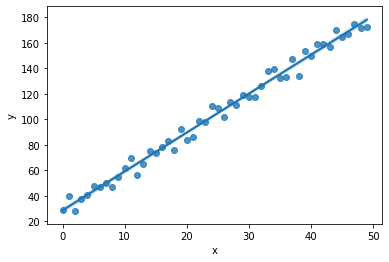

In [84]:
sns.regplot(data=df, x='x', y='y')

# Analisis con OLS sin extras

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [86]:
if agregar:
    X = df_ruidoso.drop(columns=['y'])
    y = df_ruidoso['y']
else:
    X = df.drop(columns=['y'])
    y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [87]:
model_OLS = LinearRegression(fit_intercept=True)

model_OLS.fit(X_train_std, y_train)

print(model_OLS.coef_)

print(model_OLS.intercept_)

[30.01891301  3.60952369 -2.12085326 -1.23105226 -2.94893284 -3.32001553
 -6.71405608  7.37091936  0.90789854  1.95628722 -0.42166926 -2.37214882
  1.50222412 -4.84605864  2.88921615 -4.17644188 -2.65427988 -3.59032029
 -2.24899787 -5.2999616   5.76909874 -0.74162971 -8.02244572 -2.22603118
 -2.75212161  0.34919872  3.04713909  4.17451908  3.04299503  5.01995136
 -2.27057003  3.07820788 -0.71334213  3.52464341 -0.37278891  3.13458492
  0.45154622 -3.21786353 -2.66143109 -1.15151832 -3.78384967 -1.01033244
  1.11606391  0.42001371  2.15814958 -2.16791455 -3.32220888  3.93081455
  3.05603534  1.26811315  1.23193284]
102.13433605384445


# Ahora ridge

In [88]:
model_ridge_cv = RidgeCV(alphas= [0.001, 0.01, 0.1, 0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, cv=10)
model_ridge_cv.fit(X_train_std, y_train)

print(model_ridge_cv.alpha_)

print(model_ridge_cv.coef_)

print(model_ridge_cv.intercept_)

10.0
[21.11315173  2.36312736 -1.77823881  1.76470928 -0.88325002 -1.84335346
 -2.95224413  6.84575106  1.23030701  1.42390702 -2.31747472 -1.85356088
  1.94857952 -3.66130438  1.51978648 -2.57539831 -0.66707466 -2.8193076
 -2.37528617 -4.49832754  2.67882228  0.05154798 -4.29685477 -0.43764689
 -0.93792399  2.96142854  3.39913352  5.2640685   5.23143119  2.89753169
  0.68061043  0.73925656 -2.29951943  0.88285371 -0.31521174  0.63165796
  0.03353397 -2.11152224  1.60870854 -1.12498776 -1.77113114 -0.26479968
  3.10045159  2.33932232  3.58964729 -0.84969841 -2.04175998  1.75852404
 -0.34047723  0.11794864 -0.43116485]
102.13433605384445


# Lasso

In [89]:
model_lasso_cv = LassoCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 2, 3, 6, 10.0], 
                                   fit_intercept=True, cv=10)
model_lasso_cv.fit(X_train_std, y_train)

print(model_lasso_cv.alpha_)

print(model_lasso_cv.coef_)

print(model_lasso_cv.intercept_)

1.22
[43.65843749  0.         -0.         -0.          0.         -0.
 -0.34655868  0.         -0.          0.         -0.73859296  0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.15076417  0.         -0.23336858  0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.         -0.         -0.          0.09832575 -0.
 -0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.        ]
102.13433605384445


In [90]:
# Comparamos metricas en train y en test

print ('Modelo OLS:\n')
print (f'Score (R^2) en train del modelo es {model_OLS.score(X_train_std, y_train)} y en test es {model_OLS.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (R^2) en train del modelo es {model_ridge_cv.score(X_train_std, y_train)} y en test es {model_ridge_cv.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (R^2) en train del modelo es {model_lasso_cv.score(X_train_std, y_train)} y en test es {model_lasso_cv.score(X_test_std, y_test)}')
print ('\n')

Modelo OLS:

Score (R^2) en train del modelo es 1.0 y en test es 0.3445663688273801


Modelo Ridge:

Score (R^2) en train del modelo es 0.9717718652236654 y en test es 0.47985053143870926


Modelo Lasso:

Score (R^2) en train del modelo es 0.9906654745409497 y en test es 0.976045112461497




In [91]:
from sklearn.metrics import mean_squared_error

metrica = mean_squared_error

print ('Modelo OLS:\n')
print (f'Score (MSE) en train del modelo es {metrica(y_train, model_OLS.predict(X_train_std))} y en test es {metrica(y_test, model_OLS.predict(X_test_std))}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (MSE) en train del modelo es {metrica(y_train, model_ridge_cv.predict(X_train_std))} y en test es {metrica(y_test, model_ridge_cv.predict(X_test_std))}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (MSE) en train del modelo es {metrica(y_train, model_lasso_cv.predict(X_train_std))} y en test es {metrica(y_test, model_lasso_cv.predict(X_test_std))}')
print ('\n')

Modelo OLS:

Score (MSE) en train del modelo es 3.691357342874192e-27 y en test es 1090.4640212291972


Modelo Ridge:

Score (MSE) en train del modelo es 58.115514285494214 y en test es 865.3878198358603


Modelo Lasso:

Score (MSE) en train del modelo es 19.21773266147727 y en test es 39.85444406719721


